In [49]:
import numpy as np
import matplotlib.pyplot as plt
#from sklearn.inspection import DecisionBoundaryDisplay

from sklearn.datasets import load_iris
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

In [50]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def accuracy(y, y_hat):    
    accuracy_score = (y == y_hat).mean()
    return accuracy_score


In [51]:
#load data
iris = load_iris(as_frame = True)

#just take 2 out of 4 features of the dataset for the purpose of visualization in a 2D coordinate system

X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = (iris.target == 0) # Iris virginica (just take 2 classes for visualization purpose )


linearSVC: C, train_acc =  1 1.0
linearSVC: C, train_acc =  100 1.0


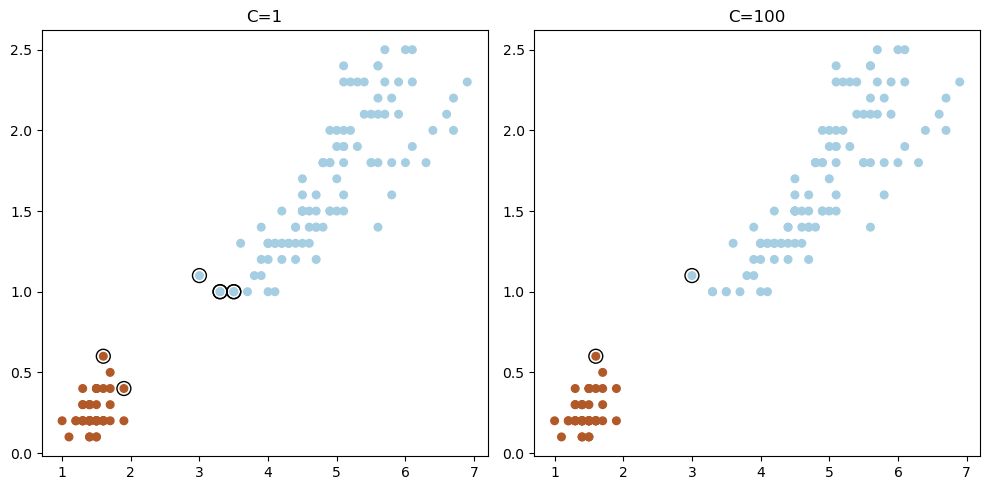

In [53]:
#train and plot the decision boundary

plt.figure(figsize=(10, 5))
for i, C in enumerate([1, 100]):
    # "hinge" is the standard SVM loss

    full_pipeline = make_pipeline(StandardScaler(), LinearSVC(C=C, loss = 'hinge', random_state=42, max_iter=15000))
    clf = full_pipeline.fit(X, y)
    
    #compute the accuracy of train
    
    y_train_predictions = clf.predict(X)
    
    train_acc = accuracy(y, y_train_predictions)
    
    print("linearSVC: C, train_acc = ", str(C), train_acc)
    
    
    #clf = LinearSVC(C=C, loss="hinge", random_state=42).fit(X, y)
    
    # obtain the support vectors through the decision function
    decision_function = clf.decision_function(X)
    # we can also calculate the decision function manually
    # decision_function = np.dot(X, clf.coef_[0]) + clf.intercept_[0]
    # The support vectors are the samples that lie within the margin
    # boundaries, whose size is conventionally constrained to 1
    support_vector_indices = np.where(np.abs(decision_function) <= 1 + 1e-15)[0]
    support_vectors = X[support_vector_indices]

    plt.subplot(1, 2, i + 1)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)
    ax = plt.gca()
#    DecisionBoundaryDisplay.from_estimator(
#        clf,
#        X,
#        ax=ax,
#        grid_resolution=50,
#        plot_method="contour",
#        colors="k",
#        levels=[-1, 0, 1],
#        alpha=0.5,
#        linestyles=["--", "-", "--"],
#    )
    plt.scatter(
        support_vectors[:, 0],
        support_vectors[:, 1],
        s=100,
        linewidth=1,
        facecolors="none",
        edgecolors="k",
    )
    plt.title("C=" + str(C))
plt.tight_layout()
plt.show()